In [5]:
# Load data
from deepmol.loaders import CSVLoader

grape_vine_dataset = CSVLoader("./vitis_vinifera.csv", smiles_field="smiles", id_field="id").create_dataset()

In [2]:
import numpy as np

labels = np.array(['C00073', 'C00078', 'C00079', 'C00082', 'C00235', 'C00341', 'C00353',
       'C00448', 'C01789', 'C03506', 'C00047', 'C00108', 'C00187', 'C00148',
       'C00041', 'C00129', 'C00062', 'C01852', 'C00049', 'C00135', 'C00223',
       'C00509', 'C00540', 'C01477', 'C05903', 'C05904', 'C05905', 'C05908',
       'C09762'])

labels_ = {
    'C00341': 'Geranyl diphosphate',
    'C01789': 'Campesterol',
    'C00078': 'Tryptophan',
    'C00049': 'L-Aspartate',
    'C00183': 'L-Valine',
    'C03506': 'Indoleglycerol phosphate',
    'C00187': 'Cholesterol',
    'C00079': 'L-Phenylalanine',
    'C00047': 'L-Lysine',
    'C01852': 'Secologanin',
    'C00407': 'L-Isoleucine',
    'C00129': 'Isopentenyl diphosphate',
    'C00235': 'Dimethylallyl diphosphate',
    'C00062': 'L-Arginine',
    'C00353': 'Geranylgeranyl diphosphate',
    'C00148': 'L-Proline',
    'C00073': 'L-Methionine',
    'C00108': 'Anthranilate',
    'C00123': 'L-Leucine',
    'C00135': 'L-Histidine',
    'C00448': 'Farnesyl diphosphate',
    'C00082': 'L-Tyrosine',
    'C00041': 'L-Alanine',
    'C00540': 'Cinnamoyl-CoA',
    'C01477': 'Apigenin',
    'C05903': 'Kaempferol',
    'C05904': 'Pelargonin',
    'C05905': 'Cyanidin',
    'C05908': 'Delphinidin',
    'C00389': 'Quercetin',
    'C01514': 'Luteolin',
    'C09762': "Liquiritigenin",
    'C00509': 'Naringenin',
    'C00223': 'p-Coumaroyl-CoA'
}

labels_names = np.array([labels_[label] for label in labels])
labels_names

array(['L-Methionine', 'Tryptophan', 'L-Phenylalanine', 'L-Tyrosine',
       'Dimethylallyl diphosphate', 'Geranyl diphosphate',
       'Geranylgeranyl diphosphate', 'Farnesyl diphosphate',
       'Campesterol', 'Indoleglycerol phosphate', 'L-Lysine',
       'Anthranilate', 'Cholesterol', 'L-Proline', 'L-Alanine',
       'Isopentenyl diphosphate', 'L-Arginine', 'Secologanin',
       'L-Aspartate', 'L-Histidine', 'p-Coumaroyl-CoA', 'Naringenin',
       'Cinnamoyl-CoA', 'Apigenin', 'Kaempferol', 'Pelargonin',
       'Cyanidin', 'Delphinidin', 'Liquiritigenin'], dtype='<U26')

In [3]:
from deepmol.pipeline import Pipeline
from deepmol.loaders import CSVLoader
from deepmol.models import SklearnModel
from deepmol.compound_featurization import MorganFingerprint, RDKFingerprint
from sklearn.linear_model import RidgeClassifier

best_pipeline = Pipeline.load('../sm_predictor_pipeline_tpe_sklearn/trial_285')
steps = [
         ('morgan fingerprints', MorganFingerprint(radius=2, size=1024, n_jobs=10)),
         ('random forest', SklearnModel(model=RidgeClassifier(random_state=42)))
         ]
best_pipeline = Pipeline(steps=steps, path="morgan_fp")

train = CSVLoader("../results_for_new_dataset/train.csv",
                        labels_fields=['C00073', 'C00078', 'C00079', 'C00082', 'C00235', 'C00341', 'C00353',
                                        'C00448', 'C01789', 'C03506', 'C00047', 'C00108', 'C00187', 'C00148',
                                        'C00041', 'C00129', 'C00062', 'C01852', 'C00049', 'C00135', 'C00223',
                                        'C00509', 'C00540', 'C01477', 'C05903', 'C05904', 'C05905', 'C05908',
                                        'C09762'],
                        id_field="ids", smiles_field="smiles").create_dataset()
valid = CSVLoader("../results_for_new_dataset/valid.csv",
                    labels_fields=['C00073', 'C00078', 'C00079', 'C00082', 'C00235', 'C00341', 'C00353',
                                    'C00448', 'C01789', 'C03506', 'C00047', 'C00108', 'C00187', 'C00148',
                                    'C00041', 'C00129', 'C00062', 'C01852', 'C00049', 'C00135', 'C00223',
                                    'C00509', 'C00540', 'C01477', 'C05903', 'C05904', 'C05905', 'C05908',
                                    'C09762'],
                    id_field="ids", smiles_field="smiles").create_dataset()
test = CSVLoader("../results_for_new_dataset/test.csv",
                    labels_fields=['C00073', 'C00078', 'C00079', 'C00082', 'C00235', 'C00341', 'C00353',
                                    'C00448', 'C01789', 'C03506', 'C00047', 'C00108', 'C00187', 'C00148',
                                    'C00041', 'C00129', 'C00062', 'C01852', 'C00049', 'C00135', 'C00223',
                                    'C00509', 'C00540', 'C01477', 'C05903', 'C05904', 'C05905', 'C05908',
                                    'C09762'],
                    id_field="ids", smiles_field="smiles").create_dataset()

dataset = train.merge([valid, test])
best_pipeline.fit(dataset)

2024-03-20 10:20:59.617968: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-20 10:20:59.728712: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-20 10:20:59.728807: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-20 10:20:59.728893: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-20 10:20:59.748164: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-20 10:20:59.749679: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

2024-03-20 10:21:07.314050: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'pytorch_lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'
/home/jcapela/miniforge3/envs/sm_precursor_predictor/lib/python3.10/site-packages/deepmol/compound_featurization/__init__.py:20: UserWarning: Mol2Vec not available. Please install it to use it. (pip install git+https://github.com/samoturk/mol2vec#egg=mol2vec)
  warnings.warn("Mol2Vec not available. Please install it to use it. "


2024-03-20 10:21:28,435 — INFO — Assuming multitask since y has more than one dimension. If otherwise, explicitly set the mode to 'classification' or 'regression'!
2024-03-20 10:21:28,592 — INFO — Assuming multitask since y has more than one dimension. If otherwise, explicitly set the mode to 'classification' or 'regression'!
2024-03-20 10:21:28,697 — INFO — Assuming multitask since y has more than one dimension. If otherwise, explicitly set the mode to 'classification' or 'regression'!
2024-03-20 10:21:28,704 — ERROR — Features are not the same length/type... Recalculate features for all inputs!
2024-03-20 10:21:28,709 — ERROR — Features are not the same length/type... Recalculate features for all inputs!


In [146]:
predictions = best_pipeline.predict(grape_vine_dataset)
ones = predictions == 1
labels_all = []
for i, prediction in enumerate(ones):
    labels_all.append(";".join(labels_names[prediction]))

In [147]:
labels_all

['',
 '',
 'Geranyl diphosphate',
 'L-Phenylalanine;Delphinidin',
 'L-Phenylalanine;Delphinidin',
 'L-Phenylalanine;p-Coumaroyl-CoA',
 'L-Phenylalanine;Kaempferol',
 'L-Phenylalanine;Kaempferol',
 'L-Phenylalanine;Kaempferol']

In [6]:
grape_vine_dataset = best_pipeline.transform(grape_vine_dataset)

[136, 202, 845, 964, 990]


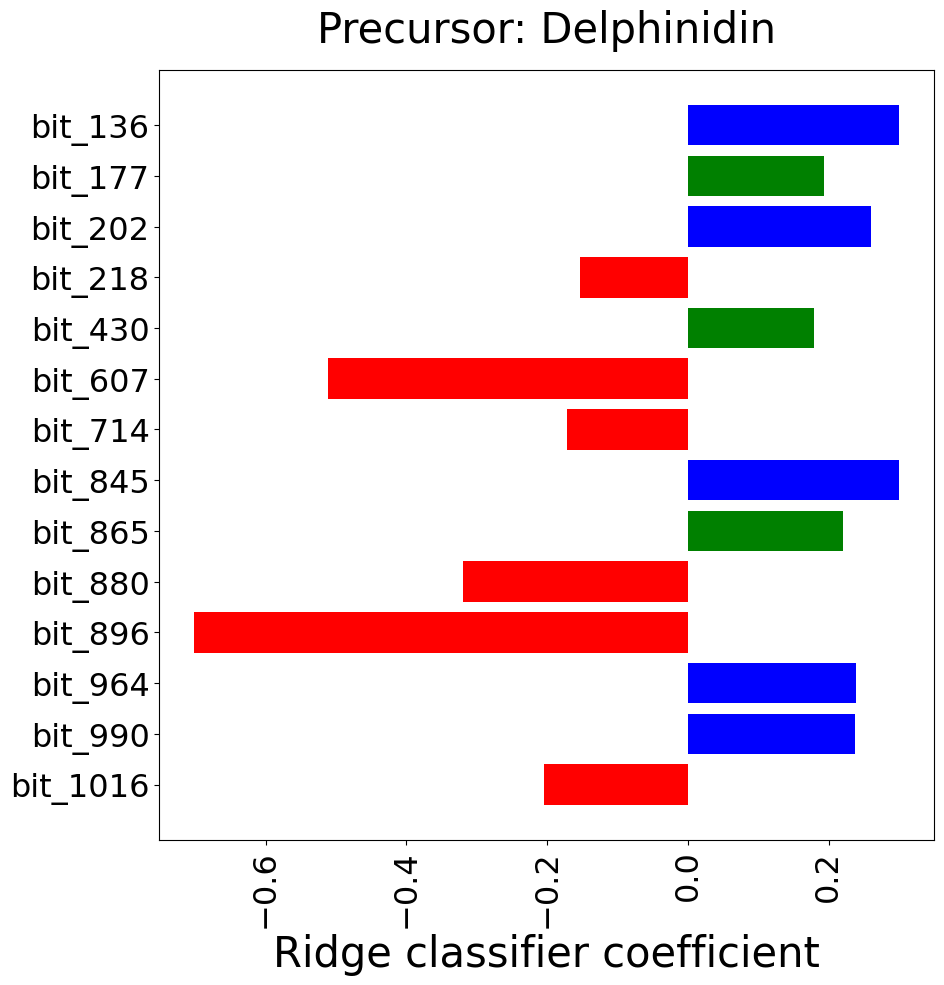

In [7]:
import re


coefs = best_pipeline.steps[-1][1].model.coef_
label = list(labels_names).index("Delphinidin")
coefs = coefs[label,:]
molecule=3
# get on bits from the morgan fingerprints
bits = grape_vine_dataset.X[molecule, :]
on_bits = []
coefs_list = []
for i, bit in enumerate(bits):
    if bit == 1 and coefs[i] > 0.17:
        on_bits.append(i)
        coefs_list.append(coefs[i])

#pd.DataFrame({"bit": on_bits, "coefs": coefs_list}).to_csv("on_bits_molecule_{}/on_bits.csv".format(0), index=False)
print(on_bits)

def draw_bits(on_bits, mol, molecule):
    from rdkit.Chem import rdMolDescriptors, Mol, rdmolops
    from deepmol.compound_featurization._utils import mol_to_svg,svg_text_to_file
    from rdkit import Chem
    from rdkit.Chem import Draw
    info = {}
    #best_pipeline.steps[0][1].draw_bit(grape_vine_dataset.mols[molecule], on_bits[2], file_path=f"bit_{bit}.png")
    rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, 2,
                                                   1024, bitInfo=info)
    
    atomsToUse = []
    atoms_ids = []
    highlightAtomColors = {}
    for bit in on_bits:
        aid, rad = info[bit][0]
        env = Chem.FindAtomEnvironmentOfRadiusN(mol, 2, aid)
        atoms_ids.append(aid)
        highlightAtomColors[aid] = (0.3, 0.3, 1)
        for b in env:
            atomsToUse.append(mol.GetBondWithIdx(b).GetBeginAtomIdx())
            atomsToUse.append(mol.GetBondWithIdx(b).GetEndAtomIdx())
    atomsToUse = list(set(atomsToUse))
    drawer = Draw.rdMolDraw2D.MolDraw2DCairo(1000, 700)
    drawer.drawOptions().addAtomIndices = True
    drawer.drawOptions().annotationFontScale = 1
    drawer.drawOptions().setHighlightColour(((0.0, 0.0, 1.0, 0.1)))
    drawer.DrawMolecule(mol, highlightAtoms=atomsToUse, highlightAtomColors=highlightAtomColors)
    drawer.FinishDrawing()
    drawer.WriteDrawingText(f"molecule_{molecule}.png")   
    # depiction = mol_to_svg(mol, molSize=(450, 200), highlightAtoms=atomsToUse, highlightAtomColors=highlightAtomColors, drawer=drawer)
    # svg_text_to_file(depiction.data, f"molecule_{molecule}.svg")

def draw_feature_importance_plot(coefs, on_bits, title="", threshold=0.15):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    coefs = pd.Series(coefs)
    bits = []
    coefs_to_plot = []
    for i, coef in enumerate(coefs):
        if coef >= threshold or coef <= -threshold or i in on_bits:
            bits.append("bit_{}".format(i))
            coefs_to_plot.append(coef)
    plt.figure(figsize=(10, 10))
    sns.barplot(x=coefs_to_plot, y=bits, orient='h')
    plt.xticks(rotation=90)
    # paint bars above 0 with green and below 0 with red
    for i, coef in enumerate(coefs_to_plot):
        if int(re.search("\d+", bits[i]).group()) in on_bits:
            plt.barh(i, coef, color='blue')
        elif coef > 0:
            plt.barh(i, coef, color='green')
        else:
            plt.barh(i, coef, color='red')
    
    plt.title(f"Precursor: {title}", pad =20, fontsize=30)
    plt.xlabel('Ridge classifier coefficient', fontsize=30)
    plt.yticks(fontsize=23)
    plt.xticks(fontsize=23)
    plt.show()


draw_bits(on_bits, grape_vine_dataset.mols[molecule], "petunidin")
draw_feature_importance_plot(coefs, on_bits, title="Delphinidin")

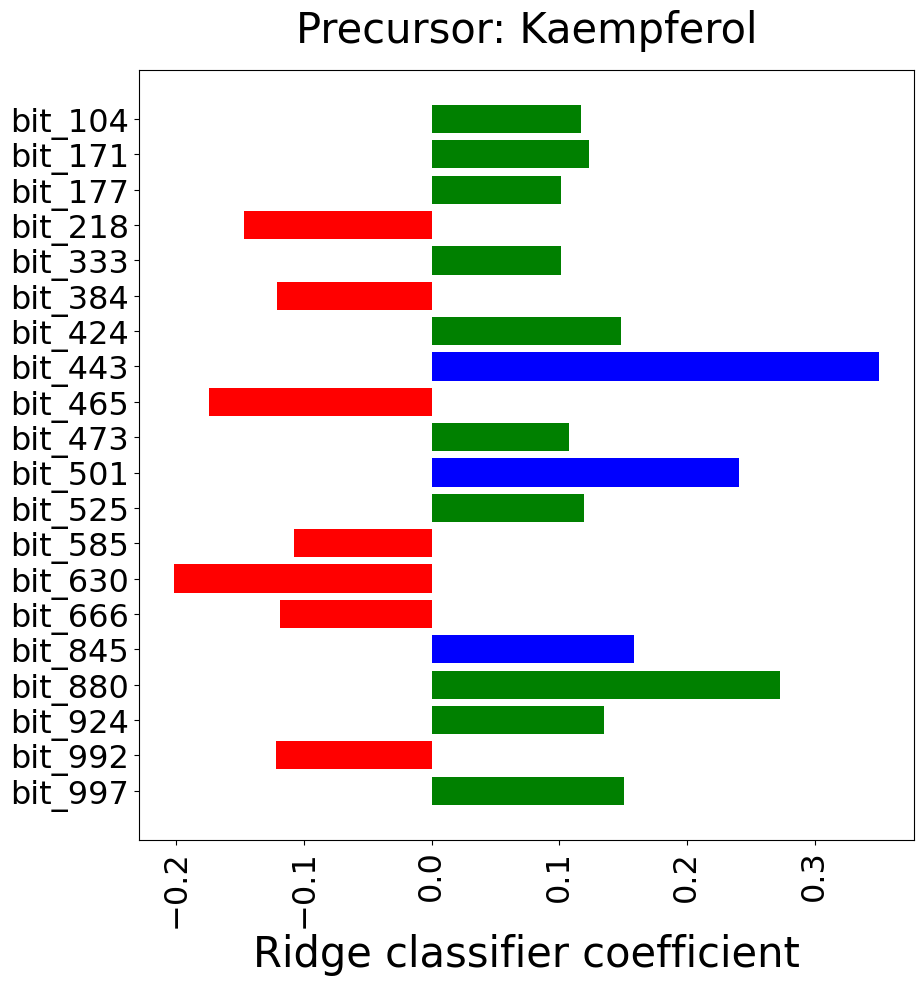

In [8]:
coefs = best_pipeline.steps[-1][1].model.coef_
coefs = coefs[list(labels_names).index("Kaempferol"),:]
molecule=6
# get on bits from the morgan fingerprints
bits = grape_vine_dataset.X[molecule, :]
on_bits = []
coefs_list = []
for i, bit in enumerate(bits):
    if bit == 1 and coefs[i] > 0.15:
        on_bits.append(i)
        coefs_list.append(coefs[i])

draw_bits(on_bits, grape_vine_dataset.mols[molecule], molecule)
draw_feature_importance_plot(coefs, on_bits, title="Kaempferol", threshold=0.10)

# Tomato case studies

In [9]:
from deepmol.loaders import CSVLoader

tomato_dataset = CSVLoader("tomato.csv", smiles_field="smiles", id_field="id").create_dataset()

In [10]:
predictions = best_pipeline.predict(tomato_dataset)
ones = predictions == 1
labels_all = []
for i, prediction in enumerate(ones):
    labels_all.append(";".join(labels_names[prediction]))
labels_all

['Tryptophan',
 'Geranylgeranyl diphosphate',
 'Geranylgeranyl diphosphate',
 'Cholesterol',
 'Cholesterol',
 'Cholesterol',
 'Geranyl diphosphate']

In [12]:
tomato_dataset = best_pipeline.transform(tomato_dataset)

[33, 36, 234, 301, 528, 764]


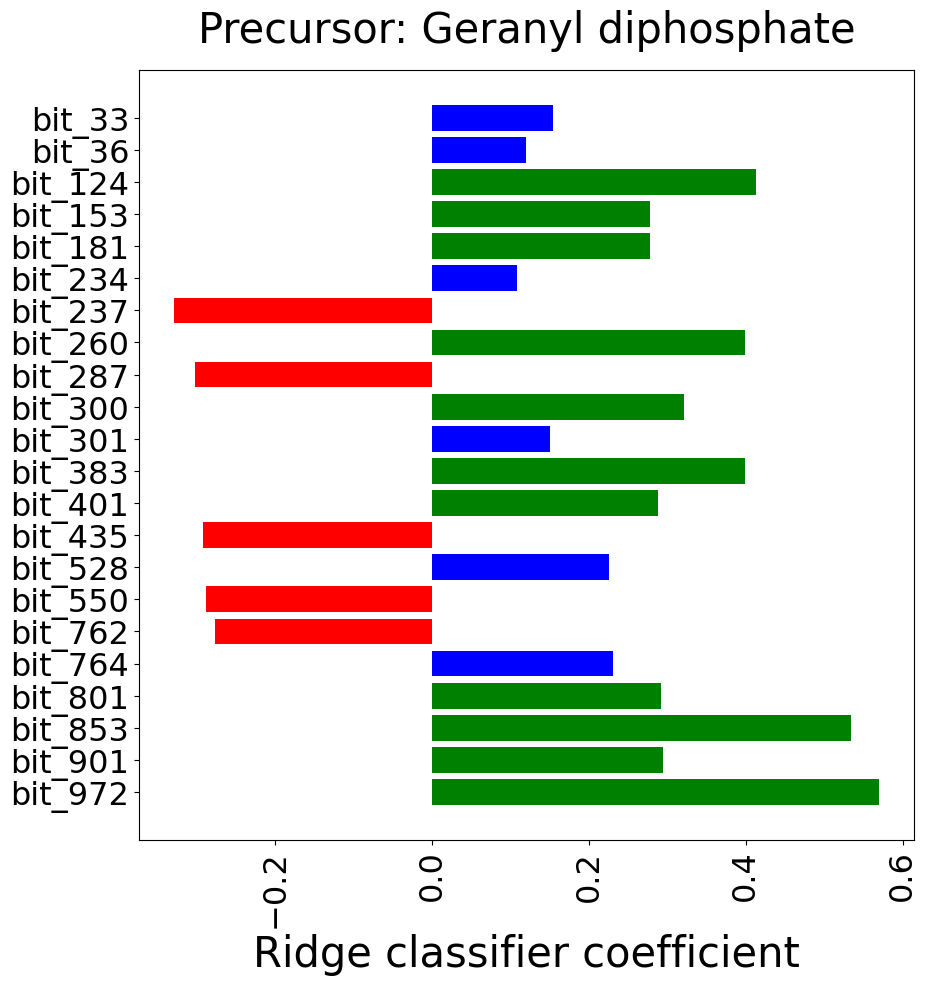

In [18]:
coefs = best_pipeline.steps[-1][1].model.coef_
label = list(labels_names).index("Geranyl diphosphate")
coefs = coefs[label,:]
molecule=6
# get on bits from the morgan fingerprints
bits = tomato_dataset.X[molecule, :]
on_bits = []
coefs_list = []
for i, bit in enumerate(bits):
    if bit == 1 and coefs[i] > 0.10:
        on_bits.append(i)
        coefs_list.append(coefs[i])

print(on_bits)
draw_bits(on_bits, tomato_dataset.mols[molecule], molecule)
draw_feature_importance_plot(coefs, on_bits, "Geranyl diphosphate", 0.27)

[345, 645, 999]


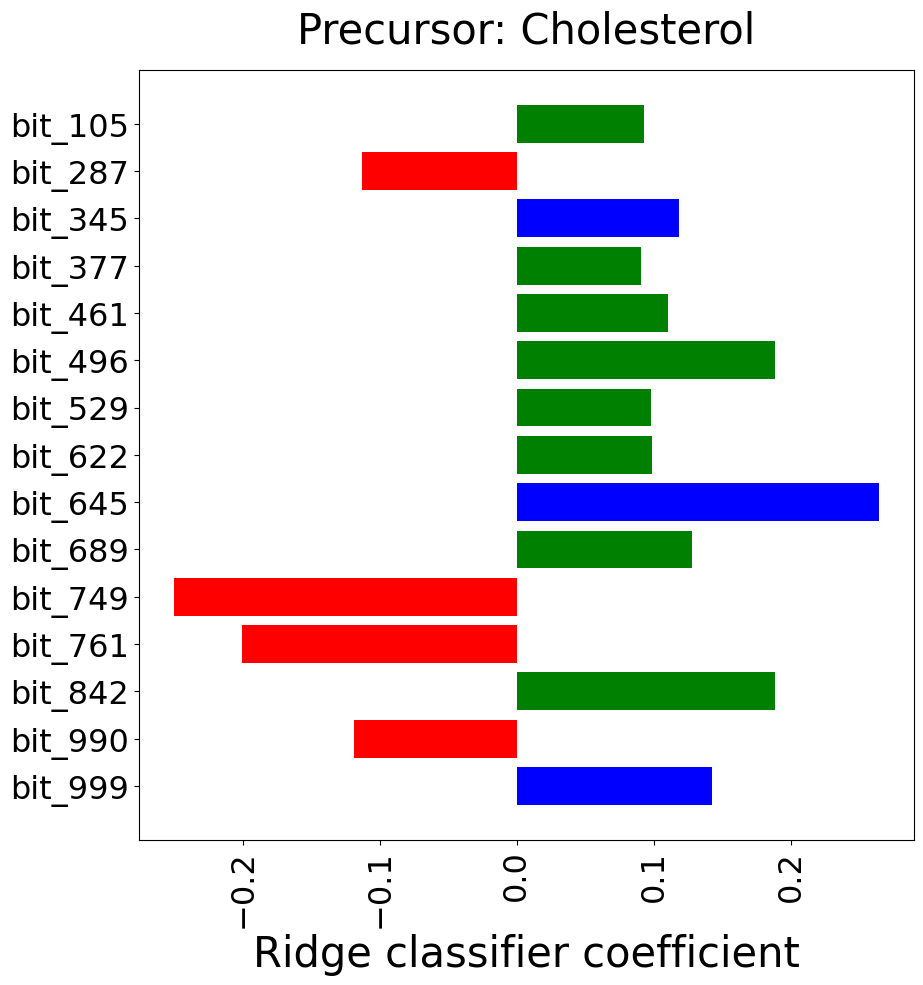

In [154]:
coefs = best_pipeline.steps[-1][1].model.coef_
label = list(labels_names).index("Cholesterol")
coefs = coefs[label,:]
molecule=5
# get on bits from the morgan fingerprints
bits = tomato_dataset.X[molecule, :]
on_bits = []
coefs_list = []
for i, bit in enumerate(bits):
    if bit == 1 and coefs[i] > 0.10:
        on_bits.append(i)
        coefs_list.append(coefs[i])

print(on_bits)
draw_bits(on_bits, tomato_dataset.mols[molecule], molecule)
draw_feature_importance_plot(coefs, on_bits, "Cholesterol", 0.09)

[223, 333, 378, 506, 721, 759, 787, 1020]


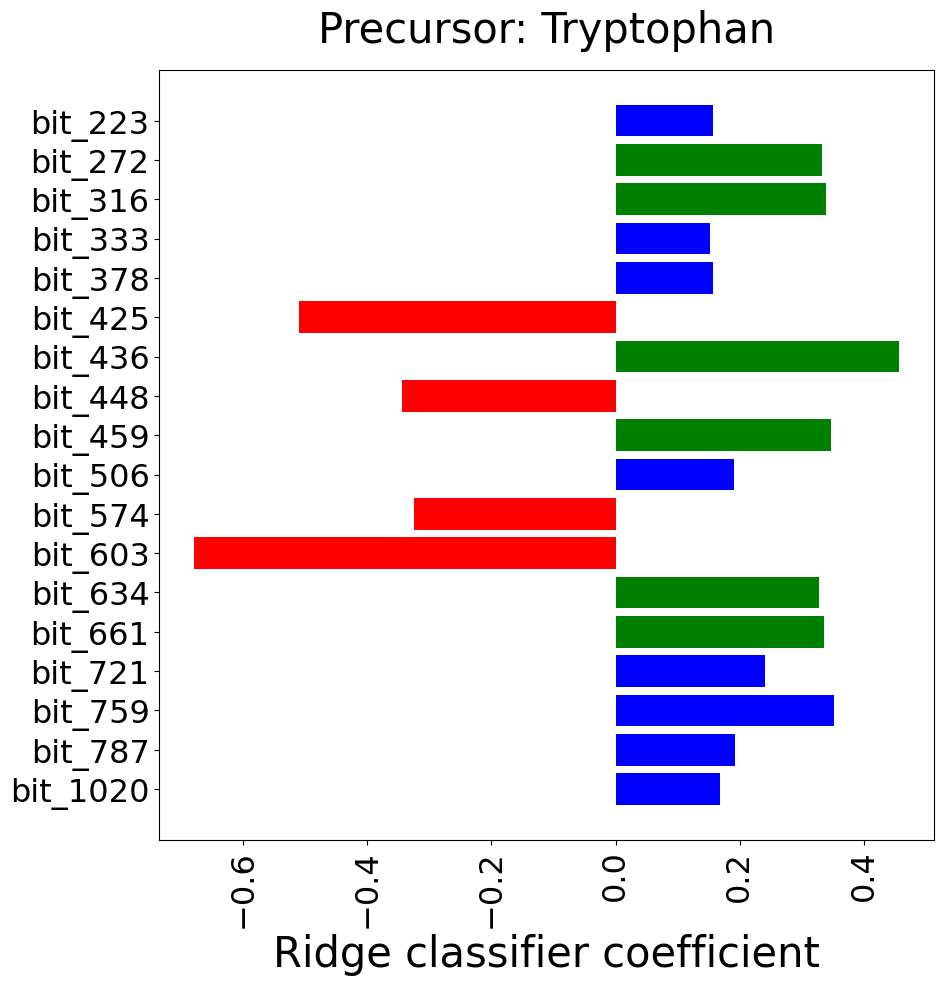

In [177]:
coefs = best_pipeline.steps[-1][1].model.coef_
label = list(labels_names).index("Tryptophan")
coefs = coefs[label,:]
molecule=0
# get on bits from the morgan fingerprints
bits = tomato_dataset.X[molecule, :]
on_bits = []
coefs_list = []
for i, bit in enumerate(bits):
    if bit == 1 and coefs[i] > 0.15:
        on_bits.append(i)
        coefs_list.append(coefs[i])

print(on_bits)
draw_bits(on_bits, tomato_dataset.mols[molecule], molecule)
draw_feature_importance_plot(coefs, on_bits, "Tryptophan", 0.32)

In [156]:
from deepmol.loaders import CSVLoader

quinine_dataset = CSVLoader("secologanin.csv", smiles_field="smiles", id_field="id").create_dataset()

In [157]:
quinine_dataset = best_pipeline.transform(quinine_dataset)

In [158]:
predictions = best_pipeline.predict(quinine_dataset)
ones = predictions == 1
labels_all = []
for i, prediction in enumerate(ones):
    labels_all.append(";".join(labels_names[prediction]))
labels_all

['Tryptophan;Secologanin']

In [159]:
coefs = best_pipeline.steps[-1][1].model.coef_
label = list(labels_names).index("Secologanin")
coefs = coefs[label,:]
molecule=0
# get on bits from the morgan fingerprints
bits = quinine_dataset.X[molecule, :]
on_bits = []
coefs_list = []
for i, bit in enumerate(bits):
    if bit == 1 and coefs[i] > 0.15:
        on_bits.append(i)
        coefs_list.append(coefs[i])

print(on_bits)
draw_bits(on_bits, quinine_dataset.mols[molecule], molecule)

[584, 595, 638]


In [160]:
from PIL import Image
import io
from rdkit.Chem.Draw import SimilarityMaps

def show_png(data):
    bio = io.BytesIO(data)
    img = Image.open(bio)
    return img

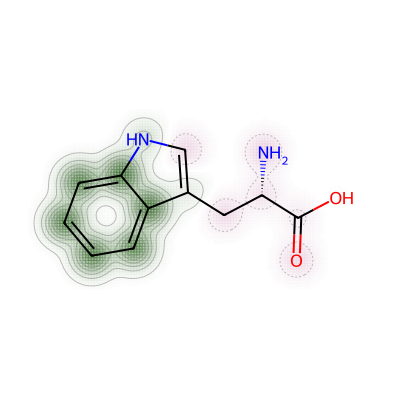

In [161]:
from rdkit.Chem import MolFromSmiles
from rdkit import Chem

d = Chem.Draw.MolDraw2DCairo(400, 400)
_, maxWeight = SimilarityMaps.GetSimilarityMapForFingerprint(tomato_dataset.mols[0], MolFromSmiles("C1=CC=C2C(=C1)C(=CN2)C[C@@H](C(=O)O)N"), lambda m, i: SimilarityMaps.GetMorganFingerprint(m, i, radius=2, fpType='bv'), 
                                        draw2d=d)
d.FinishDrawing()
show_png(d.GetDrawingText())

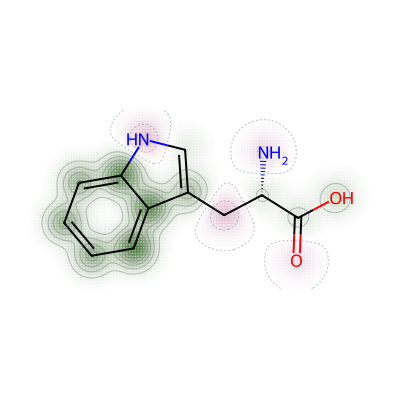

In [162]:
from rdkit.Chem import MolFromSmiles
from rdkit import Chem

d = Chem.Draw.MolDraw2DCairo(400, 400)
_, maxWeight = SimilarityMaps.GetSimilarityMapForFingerprint(quinine_dataset.mols[0], MolFromSmiles("C1=CC=C2C(=C1)C(=CN2)C[C@@H](C(=O)O)N"), lambda m, i: SimilarityMaps.GetMorganFingerprint(m, i, radius=2, fpType='bv'), 
                                        draw2d=d)
d.FinishDrawing()
show_png(d.GetDrawingText())

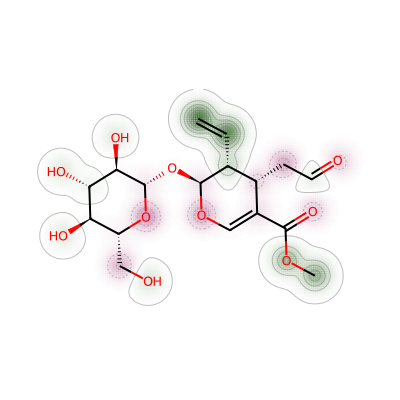

In [163]:
from rdkit.Chem import MolFromSmiles
from rdkit import Chem

d = Chem.Draw.MolDraw2DCairo(400, 400)
_, maxWeight = SimilarityMaps.GetSimilarityMapForFingerprint(quinine_dataset.mols[0], MolFromSmiles("COC(=O)C1=CO[C@H]([C@@H]([C@@H]1CC=O)C=C)O[C@H]2[C@@H]([C@H]([C@@H]([C@H](O2)CO)O)O)O"), lambda m, i: SimilarityMaps.GetMorganFingerprint(m, i, radius=2, fpType='bv'), 
                                        draw2d=d)
d.FinishDrawing()
show_png(d.GetDrawingText())

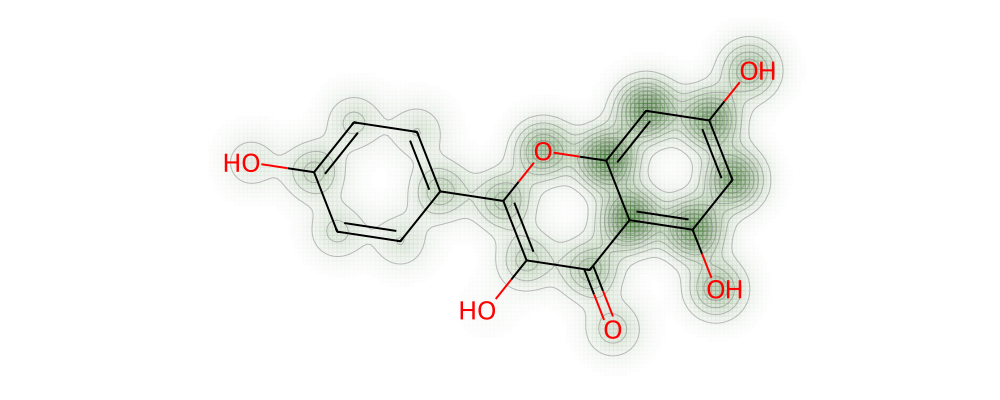

In [164]:
from rdkit.Chem import MolFromSmiles
from rdkit import Chem

d = Chem.Draw.MolDraw2DCairo(1000, 400)
_, maxWeight = SimilarityMaps.GetSimilarityMapForFingerprint(grape_vine_dataset.mols[-3],MolFromSmiles("C1=CC(=CC=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O"), lambda m, i: SimilarityMaps.GetMorganFingerprint(m, i, radius=2, fpType='bv'), 
                                        draw2d=d)
d.FinishDrawing()
show_png(d.GetDrawingText())

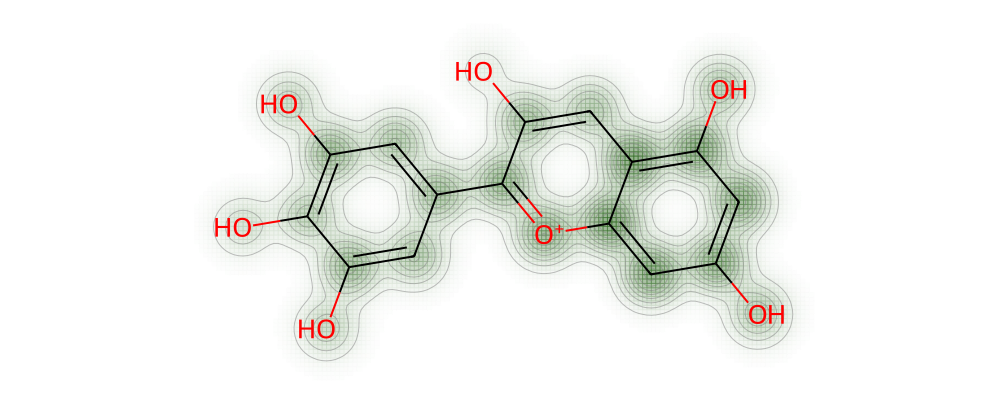

In [165]:
from rdkit.Chem import MolFromSmiles
from rdkit import Chem

d = Chem.Draw.MolDraw2DCairo(1000, 400)
_, maxWeight = SimilarityMaps.GetSimilarityMapForFingerprint(grape_vine_dataset.mols[3],MolFromSmiles("C1=C(C=C(C(=C1O)O)O)C2=[O+]C3=CC(=CC(=C3C=C2O)O)O"), lambda m, i: SimilarityMaps.GetMorganFingerprint(m, i, radius=2, fpType='bv'), 
                                        draw2d=d)
d.FinishDrawing()
show_png(d.GetDrawingText())

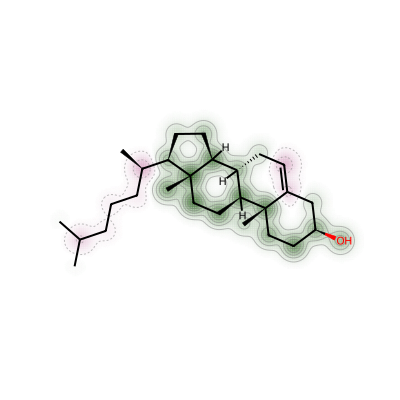

In [166]:
from rdkit.Chem import MolFromSmiles
from rdkit import Chem

d = Chem.Draw.MolDraw2DCairo(400, 400)
_, maxWeight = SimilarityMaps.GetSimilarityMapForFingerprint(tomato_dataset.mols[5],MolFromSmiles("C[C@H](CCCC(C)C)[C@H]1CC[C@@H]2[C@@]1(CC[C@H]3[C@H]2CC=C4[C@@]3(CC[C@@H](C4)O)C)C"), lambda m, i: SimilarityMaps.GetMorganFingerprint(m, i, radius=2, fpType='bv'), 
                                        draw2d=d)
d.FinishDrawing()
show_png(d.GetDrawingText())

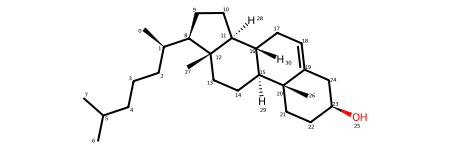

In [167]:
MolFromSmiles("C[C@H](CCCC(C)C)[C@H]1CC[C@@H]2[C@@]1(CC[C@H]3[C@H]2CC=C4[C@@]3(CC[C@@H](C4)O)C)C")

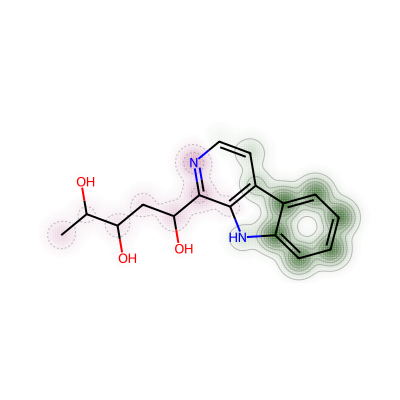

In [168]:
from rdkit.Chem import MolFromSmiles
from rdkit import Chem



d = Chem.Draw.MolDraw2DCairo(400, 400)
_, maxWeight = SimilarityMaps.GetSimilarityMapForFingerprint(MolFromSmiles("C1=CC=C2C(=C1)C(=CN2)C[C@@H](C(=O)O)N"), tomato_dataset.mols[0], lambda m, i: SimilarityMaps.GetMorganFingerprint(m, i, radius=2, fpType='bv'), 
                                        draw2d=d)
d.FinishDrawing()
show_png(d.GetDrawingText())

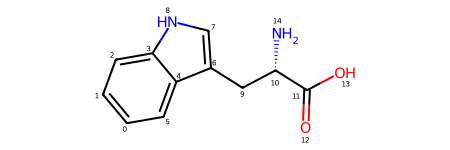

In [169]:
MolFromSmiles("C1=CC=C2C(=C1)C(=CN2)C[C@@H](C(=O)O)N")

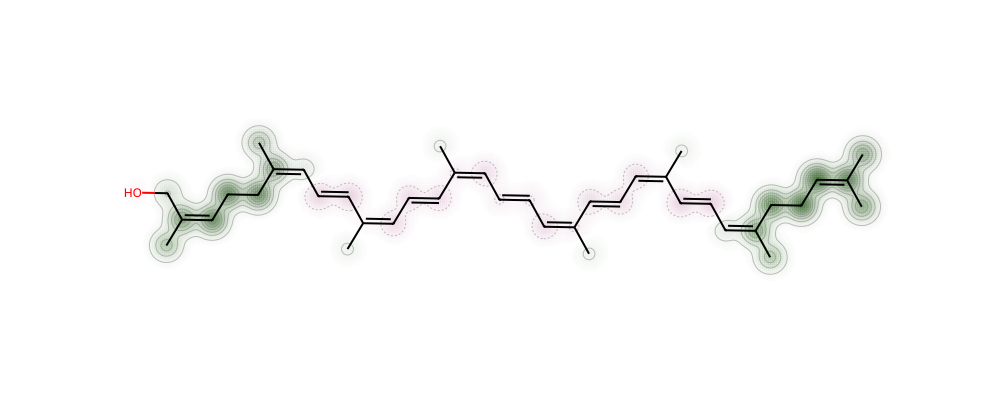

In [170]:
from rdkit.Chem import MolFromSmiles
from rdkit import Chem



d = Chem.Draw.MolDraw2DCairo(1000, 400)
_, maxWeight = SimilarityMaps.GetSimilarityMapForFingerprint(MolFromSmiles("CC(=CCC/C(=C/CC/C(=C/CC/C(=C/COP(=O)(O)OP(=O)(O)O)/C)/C)/C)C"), tomato_dataset.mols[1], lambda m, i: SimilarityMaps.GetMorganFingerprint(m, i, radius=2, fpType='bv'), 
                                        draw2d=d)
d.FinishDrawing()
show_png(d.GetDrawingText())

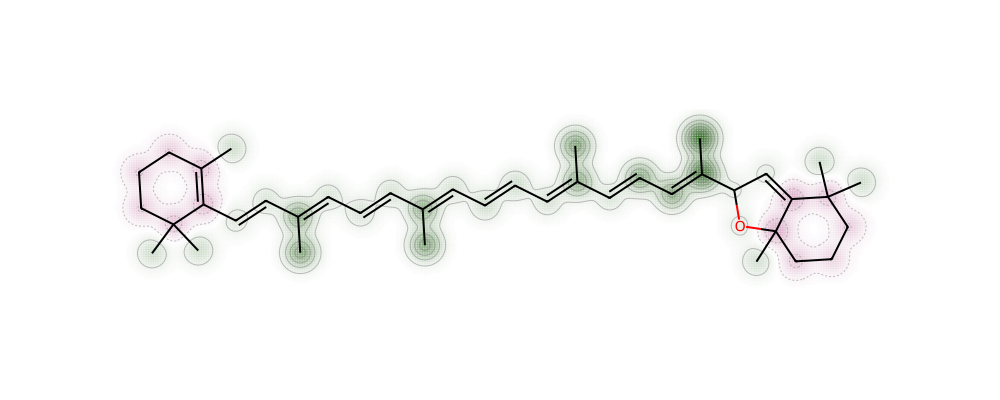

In [171]:
from rdkit.Chem import MolFromSmiles
from rdkit import Chem



d = Chem.Draw.MolDraw2DCairo(1000, 400)
_, maxWeight = SimilarityMaps.GetSimilarityMapForFingerprint(MolFromSmiles("CC(=CCC/C(=C/CC/C(=C/CC/C(=C/COP(=O)(O)OP(=O)(O)O)/C)/C)/C)C"), tomato_dataset.mols[2], lambda m, i: SimilarityMaps.GetMorganFingerprint(m, i, radius=2, fpType='bv'), 
                                        draw2d=d)
d.FinishDrawing()
show_png(d.GetDrawingText())

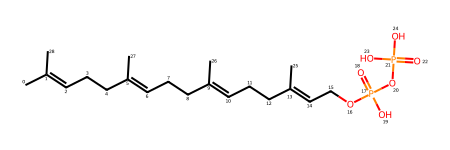

In [172]:
MolFromSmiles("CC(=CCC/C(=C/CC/C(=C/CC/C(=C/COP(=O)(O)OP(=O)(O)O)/C)/C)/C)C")